# Categorical Data Analysis

Let's load the **personality** data set as the variable **p** as it has several categorical (or qualitative) variables.

In [1]:
p <- read.csv('https://faculty.ung.edu/rsinn/personality.csv')
head(p, 4)

,Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,⋯,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,21,2,M,Y,Y,1,N,N,N,3.23,⋯,105,10,142,8,11,41,40,26,27,SE
2,20,3,F,N,N,2,Y,N,Y,3.95,⋯,105,3,172,16,11,46,52,26,33,SE
3,22,3,M,Y,N,2,N,N,N,3.06,⋯,73,1,134,15,11,48,42,44,29,AG
4,27,3,F,Y,N,3,N,N,N,2.84,⋯,90,9,160,16,10,51,51,23,19,SE


Let's first create an example data set with 3 variables which will be a subset of the *personality* data set **p**. Two columns will be qualitative while one will be numeric.

1. **Sex.** Qualitative: the biological sex of the participant.
2. **AccDate.** Qualitative: the Yes/No answer to the question: "At a time in you life when you are not romantically involved with anyone, someone asks you out. You find this person has a wondeful personality, but you do not find this person physically attractive. Do you accept the date?"
3. **Narc** Qantitative: the participant's score on a measure of Narcissism (higher values indicate more narcissism.

## Subsetting Columns in a Data Frame

**By Column Numbers.** To create a new data frame from the original, we can select only certain column numbers to show:

In [2]:
data <- p[1:8]
head(data,3)

,Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,21,2,M,Y,Y,1,N,N
2,20,3,F,N,N,2,Y,N
3,22,3,M,Y,N,2,N,N


We don't need to create a range. The columns subsetted can be non-contiguous if we use the concatenate function:

In [3]:
data <- p[c(1:3,5, 14, 22)]
head(data,3)

,Age,Yr,Sex,Corps,AccDate,TypeA
,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,21,2,M,Y,N,31
2,20,3,F,N,Y,32
3,22,3,M,N,Y,25


**By Column Titles.** We can also subset by using column titles and the concatenate function. This is the final version of **data**, our example data frame for this unit.

In [4]:
data <- p[c('Sex', 'AccDate', 'Narc')]
head(data,5)

,Sex,AccDate,Narc
,<chr>,<chr>,<int>
1,M,N,11
2,F,Y,11
3,M,Y,11
4,F,N,10
5,M,N,10


## Subsetting Rows in a Data Frame

Columns usually are variables collected on the individuals. The individuals each have a row in the data frame. Hence, sometime we need to subset the rows to select a particular group or subgroup for analayis.

We will use the **subset()** function here. We must use a formula to describe the criteria for which rows will be displayed. The cases are slightly  different for cateogry data (or what R calls factor data) vs. numeric data.

1. Category data: row == 'subgroup_title'
2. Numeric data: rows < 12

The " == " symbol asks R to only include rows from a specific subgroup. The inequalities generally serve all the purposes for which we need to subset numeric data.

**Example 1.** Suppose we wish our data frame *data* to only contain the **female responses**. We will save the subset data frame as the variable **f** so that we can use the **head()** function to display only a few rows -- enough to verify it's working properly without producing 4-5 screens of output.

In [5]:
f = subset(data, Sex == 'F')
head(f,7)

,Sex,AccDate,Narc
,<chr>,<chr>,<int>
2,F,Y,11
4,F,N,10
6,F,N,9
8,F,Y,9
9,F,N,9
10,F,N,9
12,F,Y,9


**Example 2.** How many highly narcissistic students were included in the data set if $\text{Narc}\geq 10$ counts as highly narcissistic? Again, we will save the subset as **n** for narcissism so we can use the **head()** function to view a few rows.

In [6]:
n <- subset(data, Narc >= 10)
head(n,7)

,Sex,AccDate,Narc
,<chr>,<chr>,<int>
1,M,N,11
2,F,Y,11
3,M,Y,11
4,F,N,10
5,M,N,10


The results indicate that 2 females and 3 males comprised this high range of narcissism scores.

## Data Analysis with Category Data

Suppose we have two cateogry variables. In the *data* subset, we have the variables *Sex* and *AccDate*. If we wish to determine if there is a difference in Yes/No responses due to the biological sex of the respondant, we have a couple of options.

### Crosstabs

The **xtabs** function in native R works well for this as long as we understand a statistical model must be specified. The tilda (~) to begin is a place holder only, but the addition symbol (+) indicates that the variable that follows it is categorical.

In [7]:
xtabs(~Sex + AccDate, data)

   AccDate
Sex  N  Y
  F 28 46
  M 28 27

### Mosaicplot

A great visualization tool for exactly this situation is the **mosaicplot()** function which also uses statistical model notation.

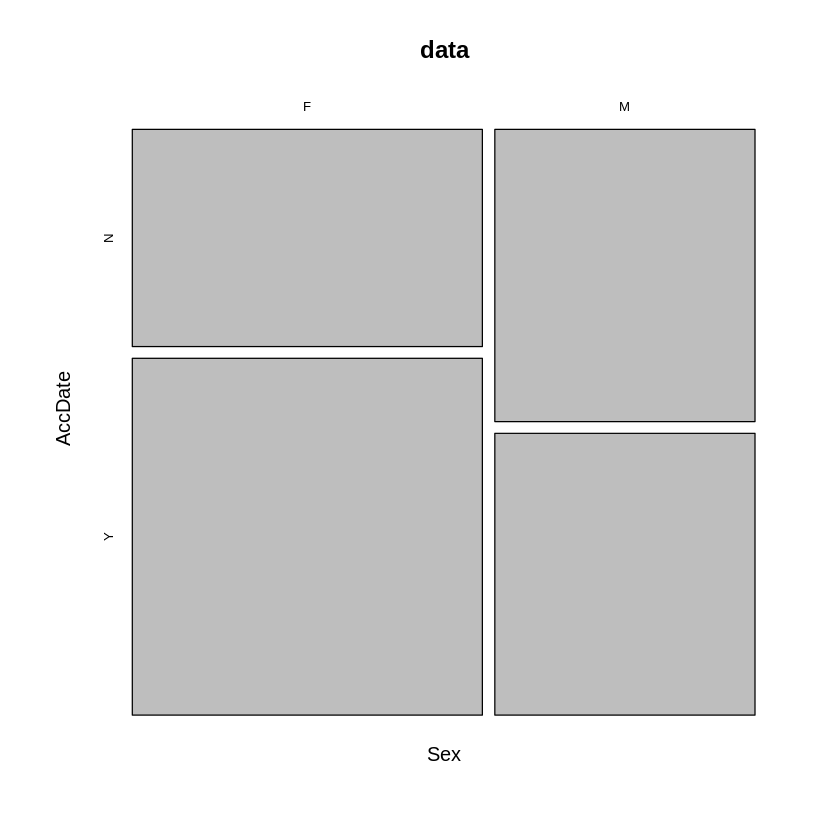

In [8]:
mosaicplot(~Sex + AccDate, data)

If both the rows and columns are separated by completely straight lines, there is no interaction between the variables. However, when the separation lines are not straight, we can see where the differences lie. In the above mosaic plot, we see that biological females are more likely to respond "Yes" to the AccDate question.

## Data Analysis with Category and Numeric Data

Often, we wish to analyze numeric data by the subgroups in a category variable. We can do this with **narcissism** in the *data* vector.

### Numeric Variable by Category

The tapply function will calcuate and displays the means for all subgroups if I order the inputs properly:

1. numeric variable
2. grouping variable
3. function to be calcuated

In [9]:
tapply(p$Narc, p$Sex, mean)

F        M 
3.945946 5.690909

Notice that the **narcissism** scores for the biological males subgroup was higher than that of biological females.

Below, we show how to calcuate means of a crosstabs table with two categorical variables. We need to add the second category variables using the **list()** function:

In [10]:
tapply(p$Narc, list(p$Sex, p$AccDate), mean )

,N,Y
F,4.392857,3.673913
M,6.428571,4.925926


The students who respond "No" to the AccDate question have higher **narcissism** scores. We also see the lower levels of narcissism in the biological females.

### 5-Number Summary with tapply() Function

The 5-Number Summary is split by the levels of the grouping variables as shown below:

In [11]:
tapply(p$Narc, p$AccDate, summary )

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.750   6.000   5.411   7.000  11.000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.137   6.000  11.000 


## Side-by-Side Boxplots and Histograms

The first subsetting will include on females in the dataframe *data*.

In [12]:
female <- subset(data, Sex == 'F')
head(female, 7)

,Sex,AccDate,Narc
,<chr>,<chr>,<int>
2,F,Y,11
4,F,N,10
6,F,N,9
8,F,Y,9
9,F,N,9
10,F,N,9
12,F,Y,9


However, the values of interest are in the **narcissism** column. We want a vector with only those values in column 3.

In [17]:
f <- subset(data, Sex == 'F')[3]
head(f, 7)

,Narc
,<int>
2,11
4,10
6,9
8,9
9,9
10,9
12,9


And similarly for the biological males:

In [18]:
m <- subset(data, Sex == 'M')[3]
head(m, 7)

,Narc
,<int>
1,11
3,11
5,10
7,9
11,9
13,8
14,8


We can return to the function **cat()** to show summaries of narcissism by biological sex.

In [33]:
cat("For the Narcissism variable, we have: \n\nfor females:", summary(f), "\nand males:  ", summary(m))

For the Narcissism variable, we have: 

for females: Min.   : 0.000   1st Qu.: 2.000   Median : 3.000   Mean   : 3.946   3rd Qu.: 6.000   Max.   :11.000   
and males:   Min.   : 1.000   1st Qu.: 4.000   Median : 6.000   Mean   : 5.691   3rd Qu.: 8.000   Max.   :11.000  

Notice that we have added 2 spaces right before "summary(m)" to align the outputs. This helps with a close comparison and contrasting of the different groups on this variable.

## Exercises

In the *personality* data set **p**, try the following:

1. Subset the data frame into a 2-column dataframe containing the grouping variable **SitClass** and the numeric variable **Perf**.
2. The **SitClass** question asked student where, if they arrived at class when most seats were available, did they prefer to sit, in the **F**ront, **M**iddle or **B**ack of the classroom? Can you use the **cat()** function to display summaries of **Perf**ectionism for of all three levels of this category variable?
3. Subset the data frame into a 3-column dataframe containing the the grouping variables **Corps** and **Yr** along with the numeric variable **Extro** which stands for extroversion.
4. Analyze the data from question 3 in all appropriate ways.